In [1]:
import numpy as np
import pandas as pd

#For Vizualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.graph_objs as go

In [2]:
data = pd.read_csv("data(1).txt")
data.to_csv('data.csv', index=None )
data.head()

,User,Movie,Rating
0,Alice,Star Wars,5
1,Frank,The Godfather,4
2,Bob,Titanic,5
3,Carol,The Matrix,3
4,Dave,Inception,2


In [3]:
data.shape

(58, 3)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   User    58 non-null     object
 1   Movie   58 non-null     object
 2   Rating  55 non-null     object
dtypes: object(3)
memory usage: 1.5+ KB


# STATISTICAL ANALYSIS

In [5]:
# To describe the data
data.describe()

,User,Movie,Rating
count,58,58,55
unique,22,8,11
top,Alice,Inception,4
freq,3,11,17


In [6]:
data.describe().T

,count,unique,top,freq
User,58,22,Alice,3
Movie,58,8,Inception,11
Rating,55,11,4,17


In [7]:
data.isnull().sum()

User      0
Movie     0
Rating    3
dtype: int64

In [8]:
data.fillna(0, inplace=True)
data.head(60)

,User,Movie,Rating
0,Alice,Star Wars,5
1,Frank,The Godfather,4
2,Bob,Titanic,5
3,Carol,The Matrix,3
4,Dave,Inception,2
5,Emily,Pulp Fiction,4
6,Quincy,Star Wars,5
7,Bob,Star Wars,2
8,Frank,Forrest Gump,3
9,Alice,The Matrix,4


In [9]:
#The data especially at the Rating column still has values that are in string 
#Convert such that they are all correct and in line for analysis 

data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data.fillna(0, inplace=True)
data.head(60)

,User,Movie,Rating
0,Alice,Star Wars,5.0
1,Frank,The Godfather,4.0
2,Bob,Titanic,5.0
3,Carol,The Matrix,3.0
4,Dave,Inception,2.0
5,Emily,Pulp Fiction,4.0
6,Quincy,Star Wars,5.0
7,Bob,Star Wars,2.0
8,Frank,Forrest Gump,3.0
9,Alice,The Matrix,4.0


In [10]:
#How Many Watchers on Each movie

data['Movie'].value_counts()


Inception        11
Star Wars         9
Forrest Gump      9
The Matrix        8
Pulp Fiction      8
The Godfather     7
Titanic           5
Matrix            1
Name: Movie, dtype: int64

In [11]:
#Computes the most popular movie by the mean of the rating

movie_mean = data.groupby('Movie')['Rating'].mean().sort_values(ascending=False).reset_index()
movie_mean.head(10)



,Movie,Rating
0,Titanic,4.400000
1,Forrest Gump,3.944444
2,The Godfather,3.857143
3,Star Wars,3.444444
4,Pulp Fiction,3.187500
5,The Matrix,3.187500
6,Inception,2.545455
7,Matrix,0.000000


- The Titanic had the Highest rating given that it had the mean rate of 4.4 out of all the movies watched by the participants. It could be that good!Let the Recommender system decide.

- Inception had the most watchers yet among the lowest mean rating of 2.5 but Matrix had one watcher but considered it a mean rating of 3.1

In [12]:
#Computes the most popular movie

movie_popularity = data.groupby('Movie')['Rating'].mean().sort_values(ascending=False).reset_index()
movie_popularity.head(10)

,Movie,Rating
0,Titanic,4.400000
1,Forrest Gump,3.944444
2,The Godfather,3.857143
3,Star Wars,3.444444
4,Pulp Fiction,3.187500
5,The Matrix,3.187500
6,Inception,2.545455
7,Matrix,0.000000


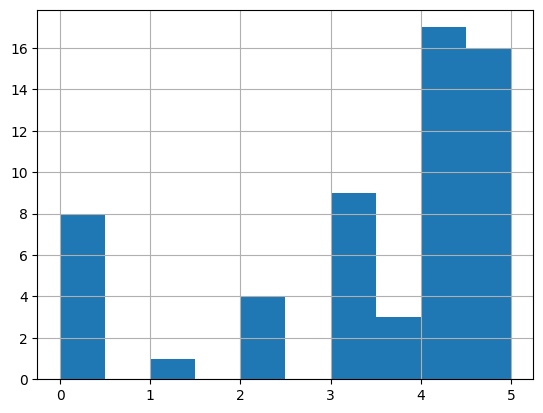

In [13]:
#Histogram based on the rating of the movies

data.Rating.hist()
plt.show()


In [14]:
# Lets prepare a Pivot Table between Users - Movies and Ratings


common_movie = data.pivot_table(index = "User",
                         columns = "Movie",
                         values = "Rating")

common_movie.head(10)


Movie,Forrest Gump,Inception,Matrix,Pulp Fiction,Star Wars,The Godfather,The Matrix,Titanic
User,,,,,,,,
Alice,NaN,3.0,NaN,NaN,5.0,NaN,4.0,NaN
Bob,NaN,NaN,NaN,NaN,2.0,4.0,NaN,5.0
Carol,NaN,5.0,NaN,4.0,NaN,NaN,3.0,NaN
Dave,5.0,2.0,NaN,NaN,NaN,NaN,NaN,4.0
Emily,3.0,NaN,NaN,4.0,NaN,5.0,NaN,NaN
Frank,3.0,NaN,NaN,NaN,5.0,4.0,NaN,NaN
Ivy,NaN,3.0,NaN,NaN,5.0,NaN,4.0,NaN
Karen,NaN,5.0,NaN,4.0,NaN,NaN,3.0,NaN
Leo,5.0,2.0,NaN,NaN,NaN,NaN,NaN,4.0


In [15]:
#Total number of users in the dataset
#How many users have watched mre than or three movies
 

users_interactions_count_df = data.groupby(['User', 'Rating']).size().groupby('User').size()
print('# users: %d' % len(users_interactions_count_df))
users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 3].reset_index()[['User']]
print('# users with at least 3 interactions: %d' % len(users_with_enough_interactions_df))


# users: 22
# users with at least 3 interactions: 14


-  There are 22 Users 
-  There are 14 Users who have watched 3 of these movies or more

Text(0.5, 1.0, 'Number of shows with Different Ratings')

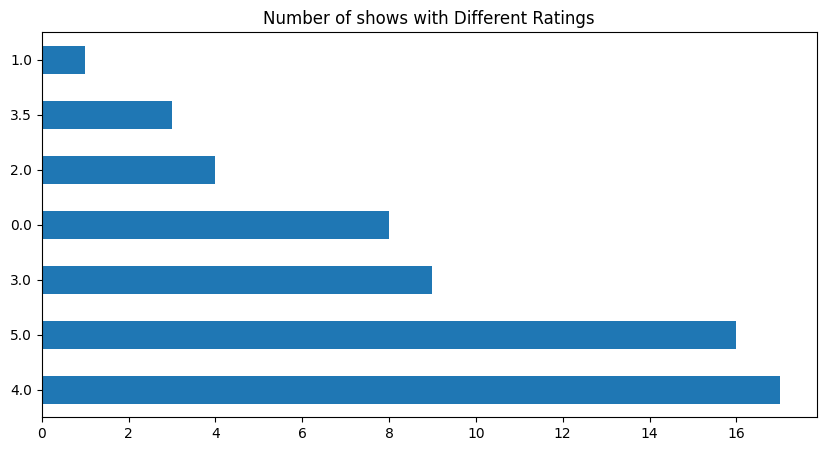

In [16]:
# Number of shows on Netflix for different age groups
plt.figure(figsize=(10,5))
data['Rating'].value_counts().plot(kind='barh')
plt.title('Number of shows with Different Ratings')


Text(0.5, 1.0, 'Movie duration distribution')

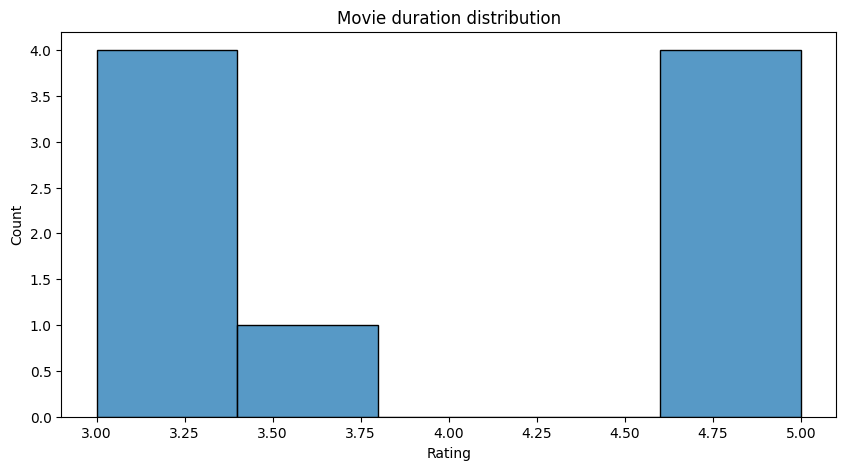

In [17]:
# length of movie analysis
plt.figure(figsize=(10,5))
sns.histplot(x='Rating',data=data[data['Movie']=='Forrest Gump'])
plt.title('Movie duration distribution')


# RECOMMENDATION SYSTEM


In [25]:
from scipy import stats
from ast import literal_eval
from surprise import Reader, Dataset, KNNBasic, accuracy
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate, train_test_split

import warnings; warnings.simplefilter('ignore')

In [23]:
sim_options = {
    'name': 'cosine',
    'user_based': True
}

algo = KNNBasic(sim_options=sim_options)

In [26]:
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

AttributeError: 'DataFrame' object has no attribute 'raw_ratings'